In [14]:
with open('beta_values.csv', 'r') as f:
    text = f.readlines()
with open('beta_values_mod.csv', 'w') as fm:  
    for line in range(len(text)):
        linelen = len(text[line].split(','))
        if linelen == 7989:
            fm.write(text[line])
            
    

In [2]:
import seaborn as sns; sns.set()


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
betas = pd.read_csv('beta_values.csv', header=0)
acoef = pd.read_csv('a_coef.csv', header=0)
bcoef = pd.read_csv('b_coef.csv', header=0)

20 , -1.214387
20 , -3.0873820000000003
20 , -4.14645
20 , -3.64468
20 , -3.64468
20 , -1.214387
20 , -3.64468
20 , -0.5669301
20 , -1.214387
20 , -4.31479
20 , -1.40197


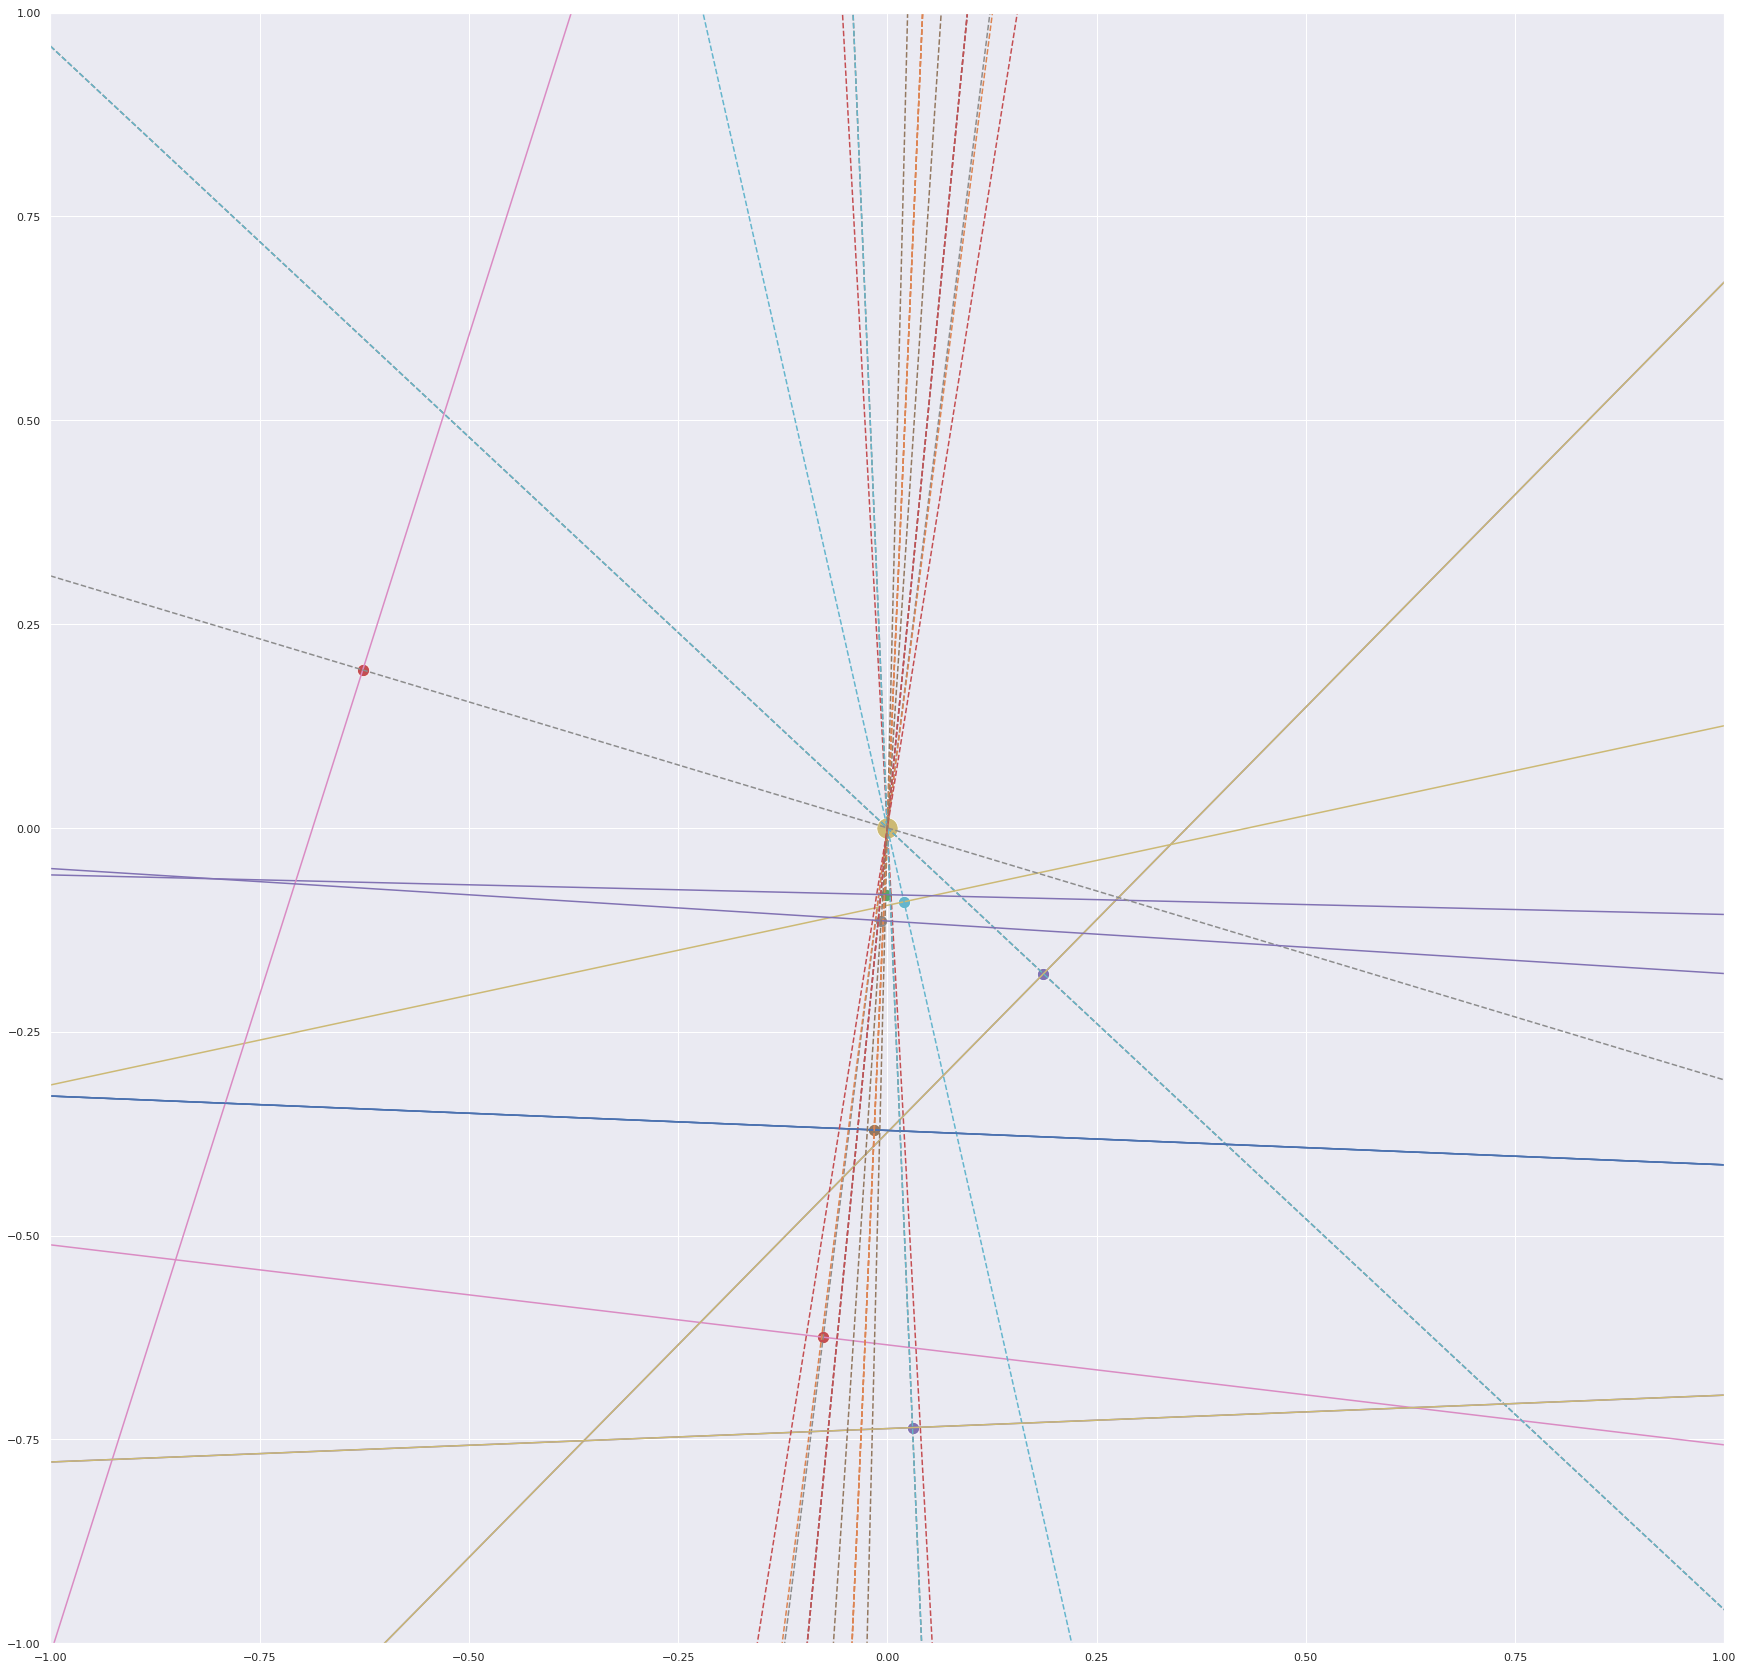

In [19]:
from itertools import cycle
a_list = acoef.iloc[4,1:19].values
b_list = bcoef.iloc[4,1:19].values
x = np.linspace(-1,1,100)
fig, ax = plt.subplots(figsize=(30,30))

ax.set_xlim((-1,1))
ax.set_ylim((-1,1))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
i = 0
for a, b in zip(a_list, b_list):
    f_line = np.vectorize(lambda x: a*x + b)
    f_line_inv = np.vectorize(lambda x: -1/a * x)
    sns.lineplot(x=x, y=f_line(x), ax=ax)
    ax.lines[-1].set_color(next(colors))

    sns.lineplot(x=x, y=f_line_inv(x), ax=ax)
    ax.lines[-1].set_linestyle("--")
    ax.lines[-1].set_color(next(colors))
    i += 1
    x_inter = -a*b/(a**2 + 1)
    sns.scatterplot(x=[x_inter], y=a*x_inter + b, markers=['*'], s=[150])
    if a < 0 and b < 0:
        print(20, ",", 20*a+b)
    else:
        pass # print("skipped")
sns.scatterplot(x=[0], y=[0], markers=['+'], s=[450])
plt.show()


In [10]:
sum(np.array([[True,False],[True,False]]))

array([2, 0])

In [215]:
a_list = acoef.iloc[:,1:].values
b_list = bcoef.iloc[:,1:].values
sum(sum((a_list < 0) & (b_list < 0)))/(lambda x,y: x*y)(*a_list.shape)

0.1581746329774869

In [214]:
(lambda x,y: x*y)(*a_list.shape)

279615

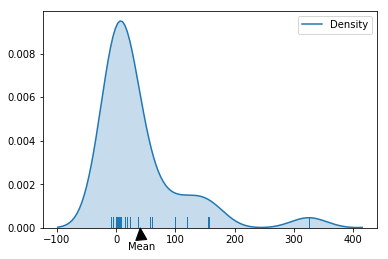

In [102]:
import seaborn as sns
betas_array = []
for x in betas.iloc[:,1:].values:
    betas_array.extend(x)
# sns.distplot(x, bins=30, kde=False, rug=True)
sns.kdeplot(x, bw=30, label="Density", shade=True)
sns.rugplot(x)

plt.annotate('Mean', xy=(np.mean(x),0), xytext=(np.median(x)+11,-0.001),
             arrowprops=dict(facecolor='black', shrink=0.001, headwidth=11, width=6))
plt.show()

(array([298.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 600.,   0.,   0.,   0.,   0., 297.,
          0., 593.,   0., 297., 291., 306., 582., 900., 872.,   0.,   0.,
        595.,   0.,   0.,   0.,   0., 300., 294., 299.,   0., 296., 282.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 297., 287.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 303.]),
 array([-0.636845  , -0.61356149, -0.59027797, -0.56699446, -0.54371094,
        -0.52042743, -0.49714391, -0.4738604 , -0.45057689, -0.42729337,
        -0.40400986, -0.38072634, -0.35744283, -0.33415931, -0.3108758 ,
        -0.28759229, -0.26430877, -0.24102526, -0.21774174, -0.19445823,
        -0.17117471, -0.1478912 , -0.12460769, -0.10132417, -0.07804066,
        -0.05475714, -0.03147363, -0.00819011,  0.0150934 ,  0.03837691,
         0.06166043,  0.08494394,  0.10822746,  0.13151097,  0.15479449,
         0.

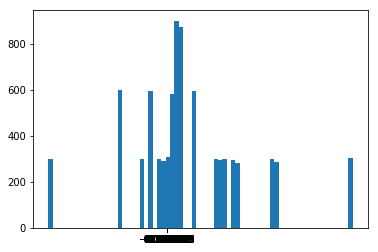

In [99]:
x = acoef.loc[5].values[1:]
plt.xticks(np.arange(-0.001, 0.001, step=0.000005))
plt.hist(x, bins=70)

betas

(array([ 289.,    0.,  294.,    0., 1188., 4746.,  887.,    0.,    0.,
         585.]),
 array([-5.201670e-04, -4.264842e-04, -3.328014e-04, -2.391186e-04,
        -1.454358e-04, -5.175300e-05,  4.192980e-05,  1.356126e-04,
         2.292954e-04,  3.229782e-04,  4.166610e-04]),
 <a list of 10 Patch objects>)

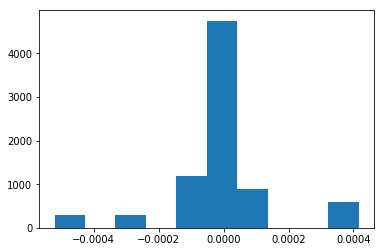

In [156]:
x = betas.loc[5].values[1:]
plt.hist(x)

(array([2.950e+02, 2.850e+02, 2.000e+00, 1.000e+00, 2.000e+00, 3.030e+02,
        1.529e+03, 4.151e+03, 1.129e+03, 2.920e+02]),
 array([-7.04296416e-04, -6.12363845e-04, -5.20431274e-04, -4.28498703e-04,
        -3.36566132e-04, -2.44633561e-04, -1.52700991e-04, -6.07684197e-05,
         3.11641512e-05,  1.23096722e-04,  2.15029293e-04]),
 <a list of 10 Patch objects>)

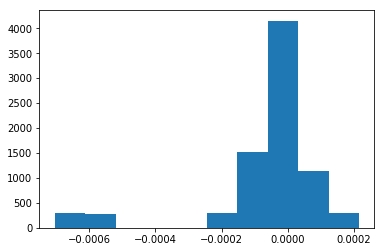

In [151]:
plt.hist(x)

In [128]:
acoef.median().median(), bcoef.median().median()

(-6.04941e-07, 3.06088e-07)

In [98]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.iloc[1080:1088, :])

Step          0           1          2          3          4         5  \
1080  1080  41.978800  -39.302800  120.73400 -47.716700  120.73400  28.35150   
1081  1081  42.150400  -38.002000  142.86400 -52.699500  142.86400  34.28340   
1082  1082  35.582800  -31.918900  126.39400 -26.131200  126.39400  34.50760   
1083  1083 -25.800300  -46.025900  -80.93760  -5.395930  -80.93760  36.26080   
1084  1084 -11.829500  126.117000  -17.42120  -5.208410  -17.42120  37.26940   
1085  1085 -80.934000   50.260800 -389.08400   0.117250 -389.08400  60.19790   
1086  1086  -0.109407   36.894500    7.49458   0.012609    7.49458   5.43901   
1087  1087  -1.142700    0.374297 -198.56800   0.057938 -198.56800  96.85190   

                6          7            8           9          10        11  \
1080   -18.885700  -0.241189   -18.885700    70.89490    9.247680 -6.332960   
1081   -20.209600  -3.503640   -20.209600    82.44770    9.155720 -6.743120   
1082   -19.634700  22.899400   -19.634700   104.06300    9.794380 -6.817610   
1083   -47.642700   7.096680   -47.642700   134.47500   20.051000 -7.756580   
1084  1378.900000   2.768140  1378.900000  -214.19900  181.232000 -9.446350   
1085    -4.106390  -0.357541    -4.106390  1175.17000   73.062400 -1.892270   
1086     0.681978   1.026880     0.681978    -3.64383   -0.049399  0.367813   
1087   -12.609200 -11.731600   -12.609200    50.34740   -0.512000 -7.292780   

            12        13         14          15         16          17  \
1080  0.289681  26.15290   0.070968    9.315730  -2.379800   14.662100   
1081  4.278150  31.41660   1.130330    9.229120  -0.351046   14.807600   
1082  4.602850  31.94860  -1.591860    9.872900 -12.124800   18.438100   
1083  8.475800  33.30520  -6.331640   20.480700  -0.006743  -37.397500   
1084  0.621087  33.08820  24.694400  228.344000  -0.831455  -13.784300   
1085  5.884490  52.26920  -1.214030   74.981300  15.267700  668.889000   
1086  4.210310   5.06821   2.259730   -0.049789   1.330270    0.807984   
1087 -0.010322  89.10460  11.038000   -0.516290   0.445033    0.979655   

              18        19         20         21        22        23  \
1080   -6.861820  16.84490  41.978800  -1.706710  -8.31694 -5.357660   
1081   -8.538890  15.00620  42.150400  -1.662520  -8.13574 -6.169890   
1082   -7.575770  17.38720  35.582800  -0.619158  -9.18922 -4.968780   
1083   -8.816810  13.54740 -25.800300  -0.990776  -9.33299 -2.916940   
1084  -13.499800  11.35380 -11.829500  -0.301363  -6.91115 -3.017080   
1085  147.430000 -14.55690 -80.934000   8.817960 -17.37410  0.058199   
1086    0.000972  79.53380  -0.109407 -84.611400 -57.21770  0.006248   
1087   -0.601671   6.27038  -1.142700  94.375800 -10.45260  0.028743   

            24         25         26            27            28         29  \
1080  15.99540   6.792080   -5.36023    -35.809400    -35.809400  -1.713960   
1081  14.25510   6.722590   -5.22597      3.975990      3.975990  -1.669540   
1082  16.49250   7.341470   -1.95032 -50423.400000 -50423.400000  -0.621759   
1083  13.02570  11.036600   -4.19109      0.287011      0.287011  -0.995412   
1084  10.98720  21.380100   -2.30223      0.031774      0.031774  -0.302963   
1085 -14.01840  39.096000   30.94380     -0.229854     -0.229854   8.856290   
1086  66.73240  -0.039531  111.57400      0.039616      0.039616 -85.576900   
1087   5.87629  -0.409455 -101.73900      0.006246      0.006246  95.613400   

             30            31        32         33         34          35  \
1080   -5.36023    -35.809400 -0.718066  120.73400   -5.36023  -39.302800   
1081   -5.22597      3.975990 -1.033050  142.86400   -5.22597  -38.002000   
1082   -1.95032 -50423.400000 -1.641320  126.39400   -1.95032  -31.918900   
1083   -4.19109      0.287011 -1.289080  -80.93760   -4.19109  -46.025900   
1084   -2.30223      0.031774  0.040662  -17.42120   -2.30223  126.117000   
1085   30.94380      3.936290  0.647728 -389.08400   30.94380   50.260800   
1086  

In [97]:
filt = df.iloc[1087, 1:] > 900
df.iloc[1087, 1:][filt]

362     5478.89
1052    1092.36
2200    2371.81
Name: 1087, dtype: float64

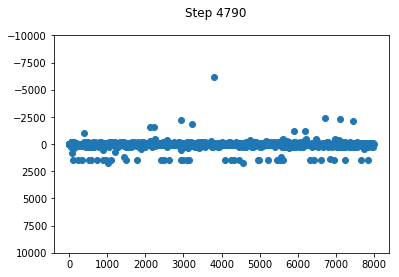

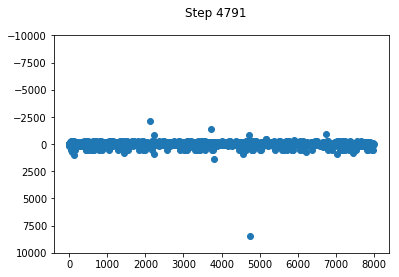

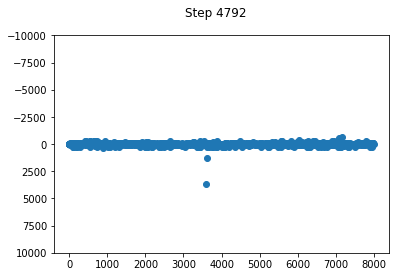

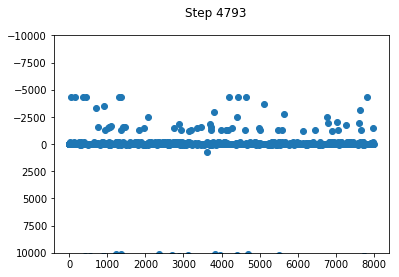

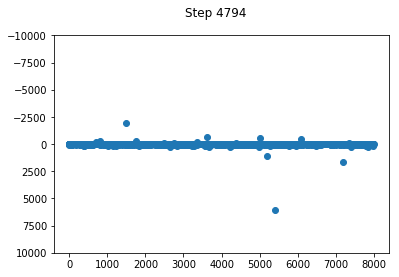

In [67]:
def plot_at_step(n):
    plt.scatter(range(7989), df[df['Step']==n].values[0][1:-1])
    plt.suptitle('Step %d' % n)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,10000, -10000))
    plt.show()

for i in range(4790, 4795):
    plot_at_step(i)

    

In [61]:
df.describe()

20.0

In [35]:
with open('beta_values_mod.csv', 'r') as f:
    text = f.readlines()

0         1        2         3         4        5        6     \
0   84.67188  -8.80404  14.5543 -1.349160  4.049810 -7.70333 -54.8631   
1   94.72086  -8.72709  15.0519 -1.178100  3.526530 -7.49229 -53.5961   
2  104.97681  -9.33811  16.2069 -1.071180  3.356790 -7.03751 -52.9469   
3  115.09986  -9.30617  16.7908  0.162686  1.120570 -6.50627 -55.1990   
4  125.26172  -9.27996  17.4159  0.350893  0.927987 -6.09270 -51.8926   
5  135.79003 -10.21330  18.9336  0.679760  0.707142 -3.55670 -47.0330   
6  146.17200  -9.50119  18.7927  0.107751  0.142245 -3.08374 -45.7164   
7  156.45545  -9.44505  19.5130  0.279690 -0.184688 -2.92667 -44.3704   

      7         8         9     ...     7979     7980      7981     7982  \
0  3.56490 -1.496770 -6.043490  ... -20.7272  -9.9363 -0.415136 -6.56829   
1  5.35290 -1.480450 -5.406600  ... -21.6089 -10.3547 -0.406104 -6.62587   
2  7.07492 -0.595394 -5.034130  ... -21.4784 -10.4053 -1.006840 -5.88087   
3  7.25869 -0.562022 -1.249640  ... -22.0977 -13.2832 -1.001450 -6.20795   
4  7.44955 -0.524577  0.684682  ... -22.7518 -12.3741 -0.997851 -5.86298   
5  7.64725 -0.480721  1.113640  ... -23.4298 -13.6654 -0.994967 -6.09657   
6  6.15890 -0.426454  0.261597  ... -22.1099 -13.9834 -0.857159 -6.36788   
7  6.35826 -0.363955 -2.393040  ... -22.9593 -14.1876 -0.845120 -6.20681   

      7983     7984     7985     7986     7987           7988  
0 -7.74739  4.57361 -5.25106 -2.86146  1.36590  4.650800e-310  
1 -7.83050  4.78011 -4.76387 -2.87105  1.41602  4.650800e-310  
2 -6.96405  4.70210 -4.58617 -1.51809  1.28420  4.650800e-310  
3 -7.36646  4.07418 -4.88657 -1.51420  2.63431  4.650800e-310  
4 -6.97174  4.22459 -4.22568 -1.51174  2.28233  4.650800e-310  
5 -7.26502  5.11195 -3.92652 -1.51137  1.96839  4.650800e-310  
6 -7.60447  5.19816 -3.59571 -1.33635  1.54518  4.650800e-310  
7 -7.42832  5.98183 -2.00364 -1.34570  1.00488  4.650800e-310  

[8 rows x 7989 columns]

In [75]:
text[35][-33:]

'4.8907,2.37969,19.5013,16.4014,0\n'

# Length of lines

In [71]:
with open('beta_values.csv', 'r') as f:
    text = f.readlines()

for line in range(len(text)):
    linelen = len(text[line].split(','))
    if line + 1 >= 15:
        print(line + 1, -14 + line + 1, linelen)

15 1 7990
16 2 7990
17 3 7990
18 4 7990
19 5 7990
20 6 7990
21 7 7990
22 8 7990
23 9 7990
24 10 7990
25 11 7990
26 12 7990
27 13 7990
28 14 7990
29 15 7990
30 16 7990
31 17 7990
32 18 7990
33 19 7990
34 20 7990
35 21 7990
36 22 7990
37 23 7990
38 24 7990
39 25 7990
40 26 7990
41 27 7990
42 28 7990
43 29 7990
44 30 7990
45 31 7990
46 32 7990
47 33 7990
48 34 7990
49 35 7990
50 36 7990
51 37 7990
52 38 7990
53 39 7990
54 40 7990
55 41 7990
56 42 7990
57 43 7990
58 44 7990
59 45 7990
60 46 7990
61 47 7990
62 48 7990
63 49 7990
64 50 7990
65 51 7990
66 52 7990
67 53 7990
68 54 7990
69 55 7990
70 56 7990
71 57 7990
72 58 7990
73 59 7990
74 60 7990
75 61 7990
76 62 7990
77 63 7990
78 64 7990
79 65 7990
80 66 7990
81 67 7990
82 68 7990
83 69 7990
84 70 7990
85 71 7990
86 72 7990
87 73 7990
88 74 7990
89 75 7990


In [67]:
with open('beta_components.csv', 'r') as f:
    text = f.readlines()
print(len(text))
for line in range(len(text)):
    linelen = len(text[line].split(','))
    if line + 1 >= 15:
        pass
    print(line + 1, -14 + line + 1, linelen)

11125
1 -13 5
2 -12 5
3 -11 5
4 -10 5
5 -9 5
6 -8 5
7 -7 5
8 -6 5
9 -5 5
10 -4 5
11 -3 5
12 -2 5
13 -1 5
14 0 5
15 1 5
16 2 5
17 3 5
18 4 5
19 5 5
20 6 5
21 7 5
22 8 5
23 9 5
24 10 5
25 11 5
26 12 5
27 13 5
28 14 5
29 15 5
30 16 5
31 17 5
32 18 5
33 19 5
34 20 5
35 21 5
36 22 5
37 23 5
38 24 5
39 25 5
40 26 5
41 27 5
42 28 5
43 29 5
44 30 5
45 31 5
46 32 5
47 33 5
48 34 5
49 35 5
50 36 5
51 37 5
52 38 5
53 39 5
54 40 5
55 41 5
56 42 5
57 43 5
58 44 5
59 45 5
60 46 5
61 47 5
62 48 5
63 49 5
64 50 5
65 51 5
66 52 5
67 53 5
68 54 5
69 55 5
70 56 5
71 57 5
72 58 5
73 59 5
74 60 5
75 61 5
76 62 5
77 63 5
78 64 5
79 65 5
80 66 5
81 67 5
82 68 5
83 69 5
84 70 5
85 71 5
86 72 5
87 73 5
88 74 5
89 75 5
90 76 5
91 77 5
92 78 5
93 79 5
94 80 5
95 81 5
96 82 5
97 83 5
98 84 5
99 85 5
100 86 5
101 87 5
102 88 5
103 89 5
104 90 5
105 91 5
106 92 5
107 93 5
108 94 5
109 95 5
110 96 5
111 97 5
112 98 5
113 99 5
114 100 5
115 101 5
116 102 5
117 103 5
118 104 5
119 105 5
120 106 5
121 107 5
122 108 5
1

1062 1048 5
1063 1049 5
1064 1050 5
1065 1051 5
1066 1052 5
1067 1053 5
1068 1054 5
1069 1055 5
1070 1056 5
1071 1057 5
1072 1058 5
1073 1059 5
1074 1060 5
1075 1061 5
1076 1062 5
1077 1063 5
1078 1064 5
1079 1065 5
1080 1066 5
1081 1067 5
1082 1068 5
1083 1069 5
1084 1070 5
1085 1071 5
1086 1072 5
1087 1073 5
1088 1074 5
1089 1075 5
1090 1076 5
1091 1077 5
1092 1078 5
1093 1079 5
1094 1080 5
1095 1081 5
1096 1082 5
1097 1083 5
1098 1084 5
1099 1085 5
1100 1086 5
1101 1087 5
1102 1088 5
1103 1089 5
1104 1090 5
1105 1091 5
1106 1092 5
1107 1093 5
1108 1094 5
1109 1095 5
1110 1096 5
1111 1097 5
1112 1098 5
1113 1099 5
1114 1100 5
1115 1101 5
1116 1102 5
1117 1103 5
1118 1104 5
1119 1105 5
1120 1106 5
1121 1107 5
1122 1108 5
1123 1109 5
1124 1110 5
1125 1111 5
1126 1112 5
1127 1113 5
1128 1114 5
1129 1115 5
1130 1116 5
1131 1117 5
1132 1118 5
1133 1119 5
1134 1120 5
1135 1121 5
1136 1122 5
1137 1123 5
1138 1124 5
1139 1125 5
1140 1126 5
1141 1127 5
1142 1128 5
1143 1129 5
1144 1130 5
1145

2062 2048 5
2063 2049 5
2064 2050 5
2065 2051 5
2066 2052 5
2067 2053 5
2068 2054 5
2069 2055 5
2070 2056 5
2071 2057 5
2072 2058 5
2073 2059 5
2074 2060 5
2075 2061 5
2076 2062 5
2077 2063 5
2078 2064 5
2079 2065 5
2080 2066 5
2081 2067 5
2082 2068 5
2083 2069 5
2084 2070 5
2085 2071 5
2086 2072 5
2087 2073 5
2088 2074 5
2089 2075 5
2090 2076 5
2091 2077 5
2092 2078 5
2093 2079 5
2094 2080 5
2095 2081 5
2096 2082 5
2097 2083 5
2098 2084 5
2099 2085 5
2100 2086 5
2101 2087 5
2102 2088 5
2103 2089 5
2104 2090 5
2105 2091 5
2106 2092 5
2107 2093 5
2108 2094 5
2109 2095 5
2110 2096 5
2111 2097 5
2112 2098 5
2113 2099 5
2114 2100 5
2115 2101 5
2116 2102 5
2117 2103 5
2118 2104 5
2119 2105 5
2120 2106 5
2121 2107 5
2122 2108 5
2123 2109 5
2124 2110 5
2125 2111 5
2126 2112 5
2127 2113 5
2128 2114 5
2129 2115 5
2130 2116 5
2131 2117 5
2132 2118 5
2133 2119 5
2134 2120 5
2135 2121 5
2136 2122 5
2137 2123 5
2138 2124 5
2139 2125 5
2140 2126 5
2141 2127 5
2142 2128 5
2143 2129 5
2144 2130 5
2145

3395 3381 5
3396 3382 5
3397 3383 5
3398 3384 5
3399 3385 5
3400 3386 5
3401 3387 5
3402 3388 5
3403 3389 5
3404 3390 5
3405 3391 5
3406 3392 5
3407 3393 5
3408 3394 5
3409 3395 5
3410 3396 5
3411 3397 5
3412 3398 5
3413 3399 5
3414 3400 5
3415 3401 5
3416 3402 5
3417 3403 5
3418 3404 5
3419 3405 5
3420 3406 5
3421 3407 5
3422 3408 5
3423 3409 5
3424 3410 5
3425 3411 5
3426 3412 5
3427 3413 5
3428 3414 5
3429 3415 5
3430 3416 5
3431 3417 5
3432 3418 5
3433 3419 5
3434 3420 5
3435 3421 5
3436 3422 5
3437 3423 5
3438 3424 5
3439 3425 5
3440 3426 5
3441 3427 5
3442 3428 5
3443 3429 5
3444 3430 5
3445 3431 5
3446 3432 5
3447 3433 5
3448 3434 5
3449 3435 5
3450 3436 5
3451 3437 5
3452 3438 5
3453 3439 5
3454 3440 5
3455 3441 5
3456 3442 5
3457 3443 5
3458 3444 5
3459 3445 5
3460 3446 5
3461 3447 5
3462 3448 5
3463 3449 5
3464 3450 5
3465 3451 5
3466 3452 5
3467 3453 5
3468 3454 5
3469 3455 5
3470 3456 5
3471 3457 5
3472 3458 5
3473 3459 5
3474 3460 5
3475 3461 5
3476 3462 5
3477 3463 5
3478

4562 4548 5
4563 4549 5
4564 4550 5
4565 4551 5
4566 4552 5
4567 4553 5
4568 4554 5
4569 4555 5
4570 4556 5
4571 4557 5
4572 4558 5
4573 4559 5
4574 4560 5
4575 4561 5
4576 4562 5
4577 4563 5
4578 4564 5
4579 4565 5
4580 4566 5
4581 4567 5
4582 4568 5
4583 4569 5
4584 4570 5
4585 4571 5
4586 4572 5
4587 4573 5
4588 4574 5
4589 4575 5
4590 4576 5
4591 4577 5
4592 4578 5
4593 4579 5
4594 4580 5
4595 4581 5
4596 4582 5
4597 4583 5
4598 4584 5
4599 4585 5
4600 4586 5
4601 4587 5
4602 4588 5
4603 4589 5
4604 4590 5
4605 4591 5
4606 4592 5
4607 4593 5
4608 4594 5
4609 4595 5
4610 4596 5
4611 4597 5
4612 4598 5
4613 4599 5
4614 4600 5
4615 4601 5
4616 4602 5
4617 4603 5
4618 4604 5
4619 4605 5
4620 4606 5
4621 4607 5
4622 4608 5
4623 4609 5
4624 4610 5
4625 4611 5
4626 4612 5
4627 4613 5
4628 4614 5
4629 4615 5
4630 4616 5
4631 4617 5
4632 4618 5
4633 4619 5
4634 4620 5
4635 4621 5
4636 4622 5
4637 4623 5
4638 4624 5
4639 4625 5
4640 4626 5
4641 4627 5
4642 4628 5
4643 4629 5
4644 4630 5
4645

5895 5881 5
5896 5882 5
5897 5883 5
5898 5884 5
5899 5885 5
5900 5886 5
5901 5887 5
5902 5888 5
5903 5889 5
5904 5890 5
5905 5891 5
5906 5892 5
5907 5893 5
5908 5894 5
5909 5895 5
5910 5896 5
5911 5897 5
5912 5898 5
5913 5899 5
5914 5900 5
5915 5901 5
5916 5902 5
5917 5903 5
5918 5904 5
5919 5905 5
5920 5906 5
5921 5907 5
5922 5908 5
5923 5909 5
5924 5910 5
5925 5911 5
5926 5912 5
5927 5913 5
5928 5914 5
5929 5915 5
5930 5916 5
5931 5917 5
5932 5918 5
5933 5919 5
5934 5920 5
5935 5921 5
5936 5922 5
5937 5923 5
5938 5924 5
5939 5925 5
5940 5926 5
5941 5927 5
5942 5928 5
5943 5929 5
5944 5930 5
5945 5931 5
5946 5932 5
5947 5933 5
5948 5934 5
5949 5935 5
5950 5936 5
5951 5937 5
5952 5938 5
5953 5939 5
5954 5940 5
5955 5941 5
5956 5942 5
5957 5943 5
5958 5944 5
5959 5945 5
5960 5946 5
5961 5947 5
5962 5948 5
5963 5949 5
5964 5950 5
5965 5951 5
5966 5952 5
5967 5953 5
5968 5954 5
5969 5955 5
5970 5956 5
5971 5957 5
5972 5958 5
5973 5959 5
5974 5960 5
5975 5961 5
5976 5962 5
5977 5963 5
5978

7228 7214 5
7229 7215 5
7230 7216 5
7231 7217 5
7232 7218 5
7233 7219 5
7234 7220 5
7235 7221 5
7236 7222 5
7237 7223 5
7238 7224 5
7239 7225 5
7240 7226 5
7241 7227 5
7242 7228 5
7243 7229 5
7244 7230 5
7245 7231 5
7246 7232 5
7247 7233 5
7248 7234 5
7249 7235 5
7250 7236 5
7251 7237 5
7252 7238 5
7253 7239 5
7254 7240 5
7255 7241 5
7256 7242 5
7257 7243 5
7258 7244 5
7259 7245 5
7260 7246 5
7261 7247 5
7262 7248 5
7263 7249 5
7264 7250 5
7265 7251 5
7266 7252 5
7267 7253 5
7268 7254 5
7269 7255 5
7270 7256 5
7271 7257 5
7272 7258 5
7273 7259 5
7274 7260 5
7275 7261 5
7276 7262 5
7277 7263 5
7278 7264 5
7279 7265 5
7280 7266 5
7281 7267 5
7282 7268 5
7283 7269 5
7284 7270 5
7285 7271 5
7286 7272 5
7287 7273 5
7288 7274 5
7289 7275 5
7290 7276 5
7291 7277 5
7292 7278 5
7293 7279 5
7294 7280 5
7295 7281 5
7296 7282 5
7297 7283 5
7298 7284 5
7299 7285 5
7300 7286 5
7301 7287 5
7302 7288 5
7303 7289 5
7304 7290 5
7305 7291 5
7306 7292 5
7307 7293 5
7308 7294 5
7309 7295 5
7310 7296 5
7311

8561 8547 5
8562 8548 5
8563 8549 5
8564 8550 5
8565 8551 5
8566 8552 5
8567 8553 5
8568 8554 5
8569 8555 5
8570 8556 5
8571 8557 5
8572 8558 5
8573 8559 5
8574 8560 5
8575 8561 5
8576 8562 5
8577 8563 5
8578 8564 5
8579 8565 5
8580 8566 5
8581 8567 5
8582 8568 5
8583 8569 5
8584 8570 5
8585 8571 5
8586 8572 5
8587 8573 5
8588 8574 5
8589 8575 5
8590 8576 5
8591 8577 5
8592 8578 5
8593 8579 5
8594 8580 5
8595 8581 5
8596 8582 5
8597 8583 5
8598 8584 5
8599 8585 5
8600 8586 5
8601 8587 5
8602 8588 5
8603 8589 5
8604 8590 5
8605 8591 5
8606 8592 5
8607 8593 5
8608 8594 5
8609 8595 5
8610 8596 5
8611 8597 5
8612 8598 5
8613 8599 5
8614 8600 5
8615 8601 5
8616 8602 5
8617 8603 5
8618 8604 5
8619 8605 5
8620 8606 5
8621 8607 5
8622 8608 5
8623 8609 5
8624 8610 5
8625 8611 5
8626 8612 5
8627 8613 5
8628 8614 5
8629 8615 5
8630 8616 5
8631 8617 5
8632 8618 5
8633 8619 5
8634 8620 5
8635 8621 5
8636 8622 5
8637 8623 5
8638 8624 5
8639 8625 5
8640 8626 5
8641 8627 5
8642 8628 5
8643 8629 5
8644

9895 9881 5
9896 9882 5
9897 9883 5
9898 9884 5
9899 9885 5
9900 9886 5
9901 9887 5
9902 9888 5
9903 9889 5
9904 9890 5
9905 9891 5
9906 9892 5
9907 9893 5
9908 9894 5
9909 9895 5
9910 9896 5
9911 9897 5
9912 9898 5
9913 9899 5
9914 9900 5
9915 9901 5
9916 9902 5
9917 9903 5
9918 9904 5
9919 9905 5
9920 9906 5
9921 9907 5
9922 9908 5
9923 9909 5
9924 9910 5
9925 9911 5
9926 9912 5
9927 9913 5
9928 9914 5
9929 9915 5
9930 9916 5
9931 9917 5
9932 9918 5
9933 9919 5
9934 9920 5
9935 9921 5
9936 9922 5
9937 9923 5
9938 9924 5
9939 9925 5
9940 9926 5
9941 9927 5
9942 9928 5
9943 9929 5
9944 9930 5
9945 9931 5
9946 9932 5
9947 9933 5
9948 9934 5
9949 9935 5
9950 9936 5
9951 9937 5
9952 9938 5
9953 9939 5
9954 9940 5
9955 9941 5
9956 9942 5
9957 9943 5
9958 9944 5
9959 9945 5
9960 9946 5
9961 9947 5
9962 9948 5
9963 9949 5
9964 9950 5
9965 9951 5
9966 9952 5
9967 9953 5
9968 9954 5
9969 9955 5
9970 9956 5
9971 9957 5
9972 9958 5
9973 9959 5
9974 9960 5
9975 9961 5
9976 9962 5
9977 9963 5
9978

In [70]:
(11125 - 3*15)/(3*75)

49.24444444444445

In [ ]:
import os
import time
while True:
    try:
        os.remove('beta_component_first_bottom.csv')
        print('removing')
    except FileNotFoundError:
        time.sleep(2)

removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
r

removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
r

removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
removing
r

In [77]:
ls

 afterminim_confout.gro            dump_u_md_Y.txt   log.txt
 afterminim.tpr                    dump_u_md_Z.txt   md.log
'Atom View.ipynb'                  em.edr           '#md.log.1#'
 beta_component_first_bottom.csv   em.gro            mdout.mdp
 conf.gro                          em.log            md.tpr
 coupling_out.prm                  em.tpr            minim.mdp
 coupling.prm                      em.trr            potential.xvg
 dump_ro_fh.txt                    ener.edr          state.cpt
 dump_ro_md.txt                   '#ener.edr.1#'     state_prev.cpt
 dump_u_fh_X.txt                   energies.png      topol.top
 dump_u_fh_Y.txt                   energy.xvg        topol.tpr
 dump_u_fh_Z.txt                   grompp.mdp        traj_comp.xtc
 dump_u_md_X.txt                   grompp.prm       '#traj_comp.xtc.1#'
